In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath('..'))
from functions import *
from models import *
from optimizers import *
from utils import *
from settings import *

In [ ]:
path = r'\Image-Text-Generator-with-numpy\datasets\EMNIST\emnist-digits-train.csv'

In [12]:
data = np.array(pd.read_csv(path))
print(data.shape)

(239999, 785)


In [13]:
x_data = data[:, 1:].reshape(-1, 28, 28).transpose(0, 2, 1).reshape(-1, 28*28) / 127.5 - 1
y_data = one_hot(data[:, 0], len(DigitsSTOI))

In [14]:
print(x_data.shape, y_data.shape)

(239999, 784) (239999, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


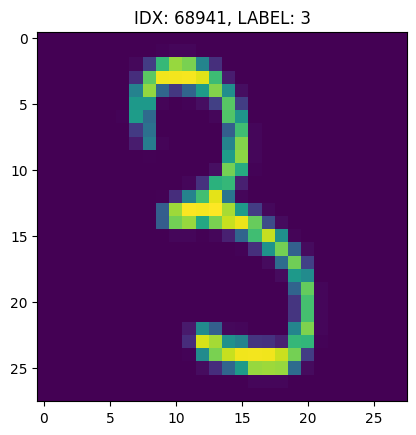

In [15]:
random_idx = np.random.randint(0, x_data.shape[0])
print(y_data[random_idx])
plt.imshow(x_data[random_idx].reshape(28, 28))
plt.title(f"IDX: {random_idx}, LABEL: {DigitsITOS[np.argmax(y_data[random_idx])]}")
plt.show()

In [16]:
cGAN = ConditionalGAN(
    generator=Generator(z_dim=128, n_classes=y_data.shape[1], out_dim=x_data.shape[1], dtype=DTYPE, name='Digit Generator'),
    discriminator=Discriminator(inp_dim=x_data.shape[1], n_classes=y_data.shape[1], dtype=DTYPE, name='Digit Discriminator'),
    name='Digit conditionalGAN'
)

cGAN.compile(
    optimizer_generator=Adam(lr=0.001, betas=(0.5, 0.999)),
    optimizer_discriminator=Adam(lr=0.001, betas=(0.5, 0.999))
)

In [17]:
cGAN.make_grafical_follow(num_images=32, imgs_path=r'C:\Users\nacho\Desktop\myGithub\Projects\Image-Text-Generator-with-numpy\images\images_digit')

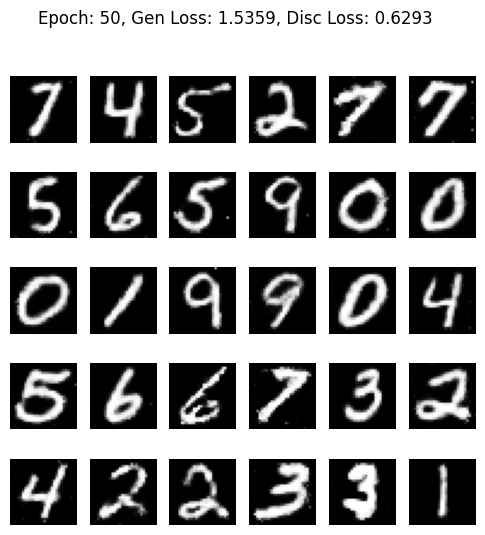

Digit conditionalGAN -> time: (454.87 sec) G Loss: 1.5359, D Loss: 0.6293


In [18]:
cGAN.train(
    x=x_data,
    y=y_data,
    epochs=50,
    batch_size=256,
    d_steps=1,
    g_steps=2,
    alpha=0.92,
    beta=1,
    verbose=True,
    debug=False
)

(1, 128) (1, 10)


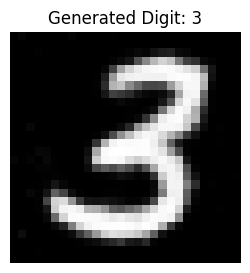

In [58]:
digit = '3'
noise, token = np.random.standard_normal(size=(1, cGAN.generator.z_dim)), one_hot(np.array([[DigitsSTOI[digit]]]), len(DigitsSTOI))
print(noise.shape, token.shape)
generated_letter = cGAN.generator.forward(noise, token)

plt.figure(figsize=(3, 3))
plt.title(f'Generated Digit: {digit}')
plt.imshow(generated_letter[0].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
cGAN.save_models(
    path_gen=r'\Image-Text-Generator-with-numpy\models\digit_generator.ot',
    path_disc=r'\Image-Text-Generator-with-numpy\models\digit_discriminator.ot'
)

In [ ]:
make_gif(cGAN.imgs_path)